# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [6]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# QUESTION #1: Is the distribution of body temperatures normal?


In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [8]:
mean=df['temperature'].mean()
mean


98.24923076923078

In [9]:
median=df['temperature'].median()
median

98.3

In [10]:
mode=df['temperature'].mode()
mode

0    98.0
dtype: float64

In [11]:
skewness=df['temperature'].skew()
skewness

-0.004419131168995771

In [12]:
kurtosis=df['temperature'].kurt()
kurtosis

0.7804573950337375

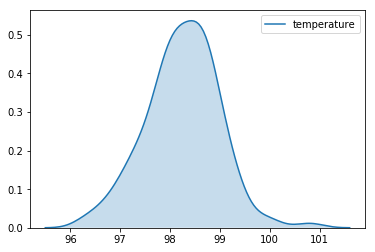

In [13]:
sns.kdeplot(df.temperature, shade=True)


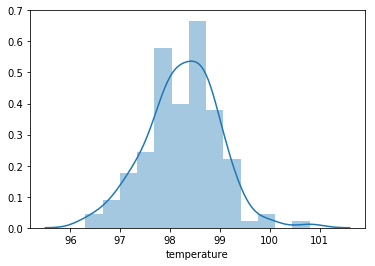

In [15]:
ax = sns.distplot(df['temperature'])


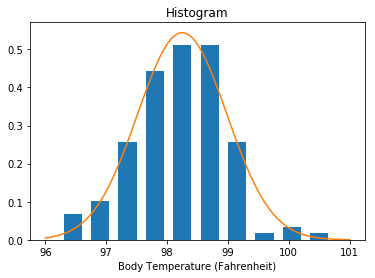

In [16]:
# Draw a histogram of body temperature and a normal distribution
plt.hist(df.temperature, width=0.3, normed=True)
plt.xlabel('Body Temperature (Fahrenheit)')
plt.title('Histogram')
xs = np.linspace(96, 101, 100)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = stats.norm.pdf(xs, temp_mean, temp_std)
plt.plot(xs, pdf)

# Conduct a test of normality
# The null hypothesis is that the sample comes from a normal distribution


In [17]:
nt = stats.mstats.normaltest(df['temperature']) 
print('The z-statstic of the normality test is {:1.3f} with a p-value of {:1.3f}.'.format(nt[0],nt[1]))


The z-statstic of the normality test is 2.704 with a p-value of 0.259.


Draw a normality quantile plot

Text(0.5,1,'Normality Quantitle Plot')

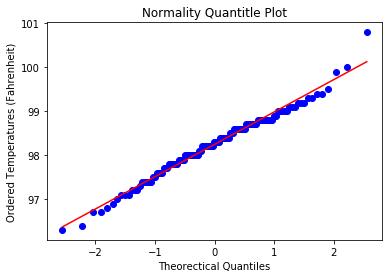

In [19]:
import pylab
stats.probplot(df.temperature, dist='norm', plot=pylab)
plt.xlabel('Theorectical Quantiles')
plt.ylabel('Ordered Temperatures (Fahrenheit)')
plt.title('Normality Quantitle Plot')

Conduct normal test using scipy

In [20]:
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254


In [21]:
test_stats, p_value =stats.shapiro(df.temperature)
print("Test statistic is ",test_stats)
print("P-value is",p_value)

Test statistic is  0.9865769743919373
P-value is 0.2331680953502655


In [22]:
# conduct hypothesis test
alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - that the data comes from a normal distribution - can be rejected")
else:
    print("The null hypothesis - that the data comes from a normal distribution - cannot be rejected")


The null hypothesis - that the data comes from a normal distribution - cannot be rejected


# ANSWER #1
To see whether the distribution is normal, we need to check whether mean=median=mode. And also, skeweness and kurtosis 
are aprroximately equal to zero and also between -1 to 1. By the values we got for the temperature we can say the distribution 
of body temperature is normal. The kde and dist plot above also shows that the distribution is normal. 

In order to check the normality, we perform the Shapiro-Wilk test to get our test statistic and p-value. 
Null hypothesis Ho= The distriution of body temperature is normal.
Since the p-value is 0.233 which is not less than our significant value of 0.05. We fail to reject the null hypothesis that the distribution is normal.

Also from chi-square statistic, the distribution appears to be normally distributed (p-value = 0.259)


# QUESTION #2: Is the sample size large? Are the observations independent?

In [24]:
# test CLT's 1st condition: sample size
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")

The sample size is large (n > 30)


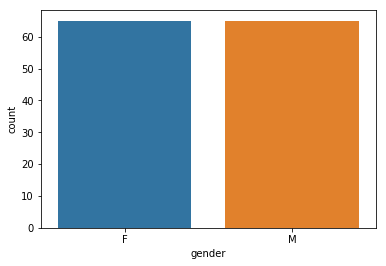

In [25]:
sns.countplot(df['gender'])   

The sample size is large (n = 130), as it is greater than 30. Assuming the observations are independent, we can invoke the central limit theorem and say that the sample mean will be approximately a normal distribution. 

NOTE: without unique observation ID's, it's difficult to determine independence, but we will proceed forward with the assumption nontheless


# ANSWER #2: 


Yes, the sample size is large (n > 30) and observations are assumed to be independent

# QUESTION #3: Is the true population mean really 98.6 degrees F?

WHY ONE-SAMPLE TEST: we're comparing one type of samples (temperature) to a single, known population mean

WHY T-TEST: population standard deviation is unknown


Use one-sample test with the null hypothesis that true population mean is 98.6
Since we do not know the population standard deviation, we will use t-statistic. 


In [26]:
n = len(df.temperature)
se = temp_std/np.sqrt(n)

t_stat = (temp_mean - 98.6)/se
p_value = stats.t.sf(np.abs(t_stat), n-1)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat, p_value))


The t-statistic is -5.455 and the p-value is 0.0000002


Now if we use z-statistic, the result will be similar because the sample size is quite large.

As sample size increases, t ditribution approaches the standard normal z distribution.


In [28]:
z_stat = (temp_mean - 98.6)/se
p_val = stats.norm.sf(np.abs(z_stat))*2
print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z_stat, p_val))


The z-statistic is -5.455 and the p-value is 0.00000005


Given that the p-value is less than 1%, there is evidence to reject the null hypthesis that the true population mean is 98.6 degrees F. 

We can conclude that the true body temperature on average is less than 98.6 degrees.

In [30]:
# conduct one-sample t-test (justification above)
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


In [31]:
# CURIOUS TEST: conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)   

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


In [32]:
# conduct hypothesis test for t-score
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected")
else:
    print("The null hypothesis - that the true population mean is 98.6 degrees F - cannot be rejected")
  

The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected


Since p-value is less than 0.05 we reject the null hypothesis that u_true_pop=98.6 degree F. Therefore, we go ahead with the alternate hypothesis that u_true_pop is less than 98.6 degree F.
The null hypothesis - that the true population mean is 98.6 degrees F - can be rejected

Let our null hyothesis Ho: True population mean (u_true_pop) = 98.6 degrees F Alternate Hypothesis H1= True population mean (u_true_pop) 
less than 98.6 degree F.

Z-test can be used only when the population standard deviation is known. Since that's unknown, we use the t-test.

# Answer 3

No, the true population mean appears to be different than 98.6 degrees (p-value = 2.4 e-07)


# QUESTION #4: Repeat both z-test & t-test for a sample of size 10 from the data. Which is the correct one to use?


In [35]:
# Construct a 95% confidence interval for the sample mean
crit = stats.t.isf([0.025,0.005], n-1)
conf_int_95 = [temp_mean - crit[0]*se, temp_mean + crit[0]*se]
print("95% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_95[0],conf_int_95[1]))


95% confidence interval: (98.12, 98.38)


In [36]:
# Construct a 99% confidence interval for the sample mean
conf_int_99 = [temp_mean - crit[1]*se, temp_mean + crit[1]*se]
print("99% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_99[0],conf_int_99[1]))


99% confidence interval: (98.08, 98.42)


We can say that 95% of the time the true average temperature will 
fall between 98.12 and 98.38. In a wider confidence interval, 
there is 99% chance that the true mean temperature will be 
between 98.08 and 98.42. 

In [38]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)


In [39]:
# conduct one-sample t-test
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)


t-statistic: -1.9622940953305195
p value = 0.0813438885721258


In [40]:
# CURIOUS TEST: conduct one-sample z-test
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -1.9622940953305195
p value = 0.04972825426520653


# ANSWER #4:

The z-test was significant (p-val < 0.05) while the t-test was not. The t-test is appropiate to use here because we're pulling from a population (the dataset) who's standard deviation is known. 


# QUESTION #5: At what temperature should we consider someone's temperature to be "abnormal"?


In [41]:
#Standard error is the standard deviation of the sampling distribution. 

std_error= df['temperature'].std()
std_error

0.7331831580389454

In [42]:
#For 95% confidence interval, the z-value =1.96. And to get the margin of error we multiply the value of z with the std_error.
margin_error= 1.96*std_error
margin_error

1.437038989756333

In [43]:
#In order to get the range, we find the confidence interval which be in the range (mean-margin_error, mean+margin_error)
CI=[mean-1.437, mean+1.437]
CI

[96.81223076923078, 99.68623076923078]

Therefore any temperature that falls outside this range can be considered abnormal.


In [44]:
#Another way
# calculate 95% confidence interval
from scipy import stats
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int)


95% confidence interval: (96.81775582674824, 99.68070571171332)


# ANSWER #5:

We can consider a temperature to be "abnormal" if it is less than 96.81 or greater than 99.68

# QUESTION #6: Is there a significant difference between males and females in normal temperature?
 

WHY TWO-SAMPLE TEST: we're comparing the difference of two quantities

WHY T-TEST: population standard deviation is unknown</span

We can use the two-sample test of the difference in means. The null hypothesis is that the average temperature for males and 
females are the same.

In [45]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))


The t-statistic is -2.285 and the p-value is 0.0239319


In [46]:
male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

males= df[df["gender"]=="M"]["temperature"]
males.count()

65

In [47]:
std_males=males.std()
std_males

0.6987557623265908

In [48]:
females=df[df["gender"]=="F"]["temperature"]
females.count()

65

In [49]:
std_females=females.std()
std_females

0.7434877527313665

Since we now have 2 different groups, we'll be doing a 2 sample t-test to get the p-value and t-statistics.


In [50]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [51]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")


The null hypothesis - that there is no difference between male and female temperatures - can be rejected


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD67EA2C18>,
      dtype=object)

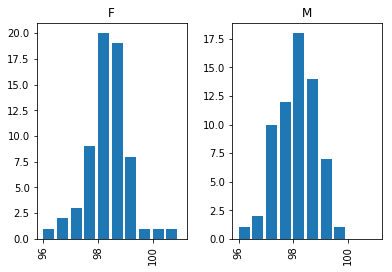

In [52]:
# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])

Thus since our p_value is above 1%, well below the 5% threshold we had decided on, we conclude that there does seem to be a significant difference between men and women in terms of body temperature. What this p-value represents is that 
if the null hypothesis was true (no difference), then we would only expect to sample such a large difference 1 out of 100 times, based on chance. So we are confident that the observed effect is real. 

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


# ANSWER #6:

Now since the p-value is 0.023< 0.05 we reject the null hypothesis that there is no difference between the mean body temperature of males and females. Therefore, we go with the alternate hypothesis which states, there is some difference 
between the mean body temperature of males and females.

Yes, the difference in male and female body temperatures is statistically significant.


# Analysis Conclusion:

1) All in all, it appears that the true normal human body temperature varies from 98.6 degrees fahreneheight.

2) Moreover, normal body temperature varies across a gaussian distribution and should only be considered "abnormal" if it varies outside the range of 96.81-99.68.

3) Finally, there's evidence in the data that there is a statistically significant difference between males and females in normal body temperature.
